<a href="https://colab.research.google.com/github/yuki4031/finance_machine_learning/blob/master/dollar_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ドライブのマウント

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import sys
ROOT_PATH = 'drive/My Drive/Colab Notebooks/finance_machine_learning'
sys.path.append(ROOT_PATH)

In [ ]:
# pip install yahoo-finance-api2

  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.12-py3-none-any.whl size=3731 sha256=b133d094e7df6b01428c21bc1836b91d22213ebb1a192506ce7763f94a0fcb17
  Stored in directory: /root/.cache/pip/wheels/df/83/e1/df62dc96545acda58900be732f6eca5f34c84f28c9bd882f75
Successfully built yahoo-finance-api2


## ライブラリの読み込み

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from function import *

## データ作成

In [37]:
code = '3994.T' # マネーフォワード
day_length = 30
minite_type = 5

df = make_data(code, day_length, minite_type)

print('欠損地の確認')
print(df.isnull().sum())
print('データの形状', df.shape)

欠損地の確認
TimeStamp      0
High         209
Low          209
Open         209
Close        209
Volume       209
dtype: int64
データの形状 (1440, 6)


In [45]:
def make_dollar_bar(df, threshold):
  df_dropped = df.dropna().reset_index(drop=True)
  print('欠損値削除後', df_dropped.shape)
  data_length = df_dropped.shape[0]
  data_list  = []
  df_dropped_list = df_dropped.to_dict('record')
  price = 0
  for i in range(data_length):
    close_data = df_dropped_list[i]['Close']
    volume_data = df_dropped_list[i]['Volume']
    price += close_data * volume_data
    if price > threshold:
      data_list.append(df_dropped_list[i])
      price = 0
  return pd.DataFrame(data_list)

In [50]:
dollar_df = make_dollar_bar(df, 100000000)
dollar_df.shape

欠損値削除後 (1231, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  


(638, 6)

## リターンの作成

In [51]:
df_dropped = df.dropna().reset_index(drop=True)
df_dropped['PrevClose'] = df_dropped['Close'].shift(1)
df_dropped['CloseReturn'] = (df_dropped['Close'] - df_dropped['PrevClose']) / df_dropped['PrevClose']

dollar_df['PrevClose'] = dollar_df['Close'].shift(1)
dollar_df['CloseReturn'] = (dollar_df['Close'] - dollar_df['PrevClose']) / dollar_df['PrevClose']

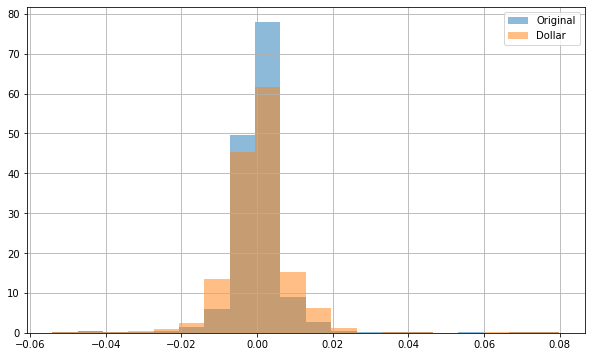

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_dropped['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Original')
plt.hist(dollar_df['CloseReturn'].values, alpha=0.5, bins=20, density=True, label='Dollar')
plt.legend()
plt.grid(True)
plt.show()